   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00
                                                text  textblob_score  \
0  I love the new product launch by BrandX! Super...        0.375947   
1  Worst customer service experience ever with Br...       -1.000000   
2    BrandX is doing great things in sustainability.        0.800000   
3  I am not sure how I feel about the new update ...       -0.056818   
4      Absolutely fantastic performance from BrandX!        0.500000   
5  Terrible app update, everything crashes. Brand...       -1.000000   

   vader_score sentiment  
0       0.9060  Positive  
1      -0.6249  Negative  
2       0.6249  Positive  
3      -0.2411  Negative  
4       0.6352  Positive  
5      -0.4767  Negative  


<ipython-input-1-48a11db465a4>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


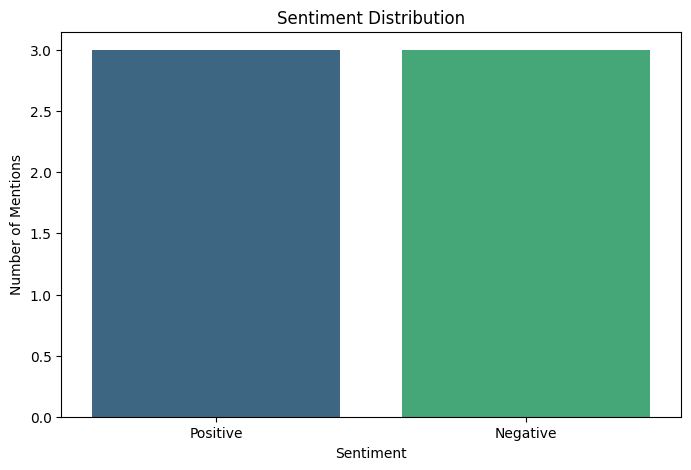

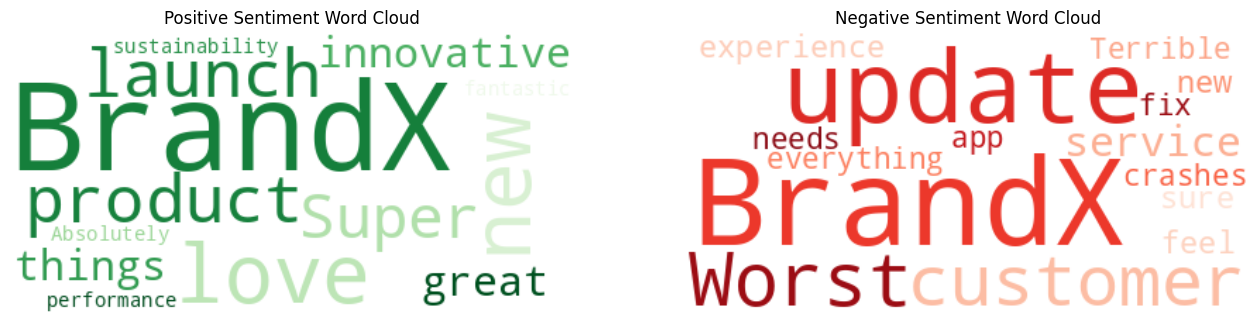

In [1]:
!pip install tweepy textblob vaderSentiment wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

data = {
    "text": [
        "I love the new product launch by BrandX! Super innovative.",
        "Worst customer service experience ever with BrandX.",
        "BrandX is doing great things in sustainability.",
        "I am not sure how I feel about the new update from BrandX.",
        "Absolutely fantastic performance from BrandX!",
        "Terrible app update, everything crashes. BrandX needs to fix this.",
    ]
}

df = pd.DataFrame(data)

def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

df['textblob_score'] = df['text'].apply(get_textblob_sentiment)
df['vader_score'] = df['text'].apply(get_vader_sentiment)

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['vader_score'].apply(classify_sentiment)

print(df)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Mentions')
plt.show()

positive_text = " ".join(df[df['sentiment'] == 'Positive']['text'])
negative_text = " ".join(df[df['sentiment'] == 'Negative']['text'])

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
wordcloud_pos = WordCloud(background_color='white', colormap='Greens').generate(positive_text)
wordcloud_neg = WordCloud(background_color='white', colormap='Reds').generate(negative_text)

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Positive Sentiment Word Cloud')
axes[0].axis('off')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Negative Sentiment Word Cloud')
axes[1].axis('off')

plt.show()
